<a href="https://colab.research.google.com/github/SamuilMladenov/LearnPyTorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

End-to-end workflow

##Steps To Cover

1. Prepare and Load the Data
2. Build the Model
3. Fit the Model to the Data
4. Make Predictions and Evaluate Model
5. Saveing and Loading the Model
6. Putting it all together

In [21]:
import torch
from torch import nn #nn contains all of Pytorch's buuilding blocks for neural networks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Data (prepaaring and loading)

Data can be anything in machine learning.

1. Excel Spreadsheet
2. IMages of any kind
3. Videos
4. Audio
5. Even
6. Text

Amchine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this. let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [22]:
# Create known parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight* X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [23]:
len(X), len(y)

(50, 50)

### Splitting data into training adn test sets (one of the most important concepts in machine learing in general)

Let's create a training and test set with our data

In [24]:
# Create a train/test split

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

In [25]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [26]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
    PLots training data, test data  and compares predictions
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

  # Are there predictions
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14})

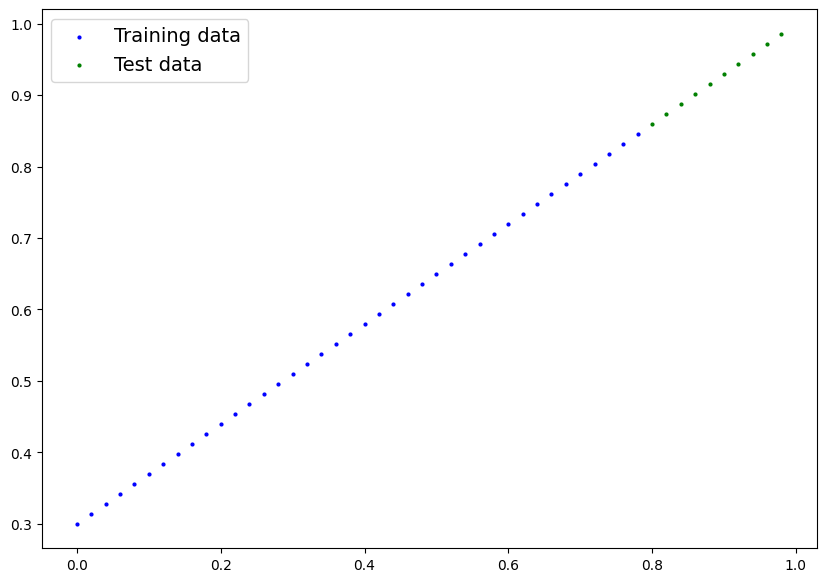

In [27]:
plot_predictions()

## 2. Build Model
My first PyTorch Model!

What the model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get close to) the ideal values (the weight and bias we used to create our data)

How does it do so?

Through two main algorithms:
1. Gradient descent
2. Backpropagantion

In [28]:
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module (imagine it as lego building bricks of models)
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- x is the input data
    return self.weight * x + self.bias # this is the linear regression formula

### Pytorch Model Building Essentials

* torch.nn - contains all of the buildings for computational graphs(neural networks can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descend
* def forward() - All nn.Module subclasses require to overwrite forward(), this method defines what happens in the forward computaion

### Checking the contents of our pytorch model

We can check our model parameters or what's inside our model using `.parameters()`

In [29]:
# Create a random seed
torch.manual_seed(43)

# Create an instance of our model (this is a subclass of nn.Model)
model_0 =  LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([-0.6484], requires_grad=True),
 Parameter containing:
 tensor([-0.7058], requires_grad=True)]

In [30]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([-0.6484])), ('bias', tensor([-0.7058]))])

### Making prediction using `torch.infrance_mode`

To Check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through out model, it's going to run it through the `forward()` method


In [31]:
# Make predictions with model (if you want to read more what inference mode is https://twitter.com/PyTorch/status/1437838231505096708?lang=en)
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[-1.2246],
        [-1.2375],
        [-1.2505],
        [-1.2635],
        [-1.2764],
        [-1.2894],
        [-1.3024],
        [-1.3153],
        [-1.3283],
        [-1.3413]])

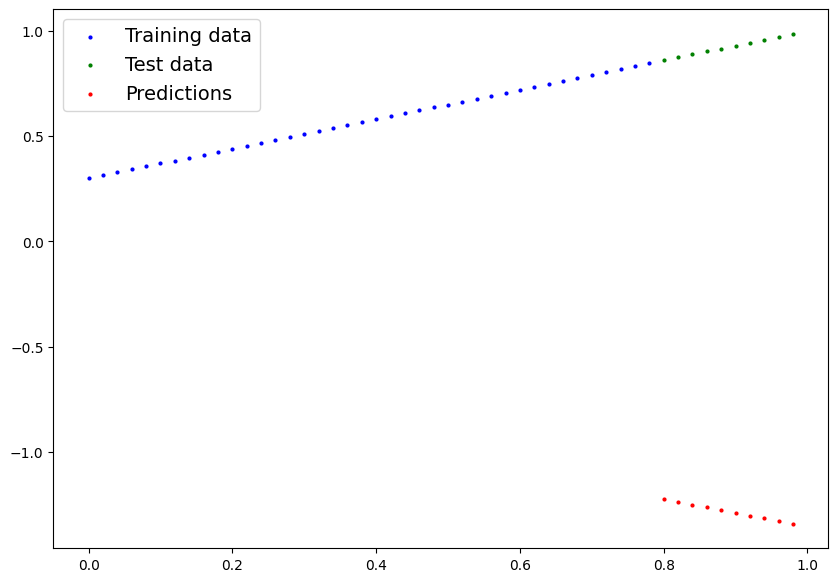

In [32]:
plot_predictions(predictions=y_preds)

## 3 Train model

The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

In other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas.

Thing's we need to train

* **Loss Function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters,
                            lr=0.01) #lr = learning rate = possibly the most important important hyperperameter you can set